## Setup

In [ ]:
# Upgrade profiling library and "Restart runtime"
#!pip install --upgrade pandas-profiling

In [ ]:
# Mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import nltk
import spacy
import pandas as pd
import numpy as np
import pandas_profiling as prof

from pathlib import Path
from textblob import TextBlob

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import plotly.graph_objs as go

import cufflinks as cf
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import iplot
from IPython.core.interactiveshell import InteractiveShell

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

InteractiveShell.ast_node_interactivity = 'all'
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True, theme='pearl')

pd.options.display.max_colwidth = 100
pd.options.display.max_columns = 30


## Exploratory Data Analysis (EDA)


You can do EDA using this simple method: Pandas Profiling
Generates profile reports from a pandas DataFrame. The pandas df.describe() function is great but a little basic for serious exploratory data analysis. pandas_profiling extends the pandas DataFrame with df.profile_report() for quick data analysis.

For each column the following statistics - if relevant for the column type - are presented in an interactive HTML report:

* Type inference: detect the types of columns in a dataframe.
* Essentials: type, unique values, missing values
* Quantile statistics like minimum value, Q1, median, Q3, maximum, range, interquartile range
* Descriptive statistics like mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, skewness
* Most frequent values
* Histogram
* Correlations highlighting of highly correlated variables, Spearman, Pearson and Kendall matrices
* Missing values matrix, count, heatmap and dendrogram of missing values
* Text analysis: learn about categories (Uppercase, Space), scripts (Latin, Cyrillic) and blocks (ASCII) of text data.
---


Play & Learn

> Learn more about data profiling: https://github.com/pandas-profiling/pandas-profiling
> Dive into sentiment analysis with TextBlob: https://textblob.readthedocs.io/en/dev/

In [ ]:
# Load dataset
data_folder = Path("/content/drive/MyDrive/NaturalLanguageUnderstanding")
clothing_reviews = data_folder / "Womens Clothing E-Commerce Reviews.csv"

### Manual EDA
with Pandas built-in methods

Overview:
* DataFrame.count: Count number of non-NA/null observations.
* DataFrame.max: Maximum of the values in the object.
* DataFrame.min: Minimum of the values in the object.
* DataFrame.mean: Mean of the values.
* DataFrame.std: Standard deviation of the observations.
* DataFrame.select_dtypes: Subset of a DataFrame including/excluding           columns based on their dtype.

In [ ]:
# Inspect the data frame
df = pd.read_csv(clothing_reviews)
df.head(10)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i n...",5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and really wanted it to work for me. i initially ordered th...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get no...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length t...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to see what it would look like in person. (store pic...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, and had a ton of stuff (as always) to try on and use...",4,1,4,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size....,5,1,0,General,Dresses,Dresses
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite to make sure the length wasn't too long. i typicall...",5,1,0,General,Dresses,Dresses


In [ ]:
# Inspect the dimensionality of your DataFrame. The shape attribute of pandas.DataFrame stores the number of rows and columns as a tuple (number of rows, number of columns).
df.shape

(23486, 11)

In [ ]:
# Remove unused coloumns
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
# Print information about your DataFrame. You can inspect the total memory usage, the data type of each column, and the number of non-NaN elements.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [ ]:
# Remove 'Title' feature <- many titles are missing
df.drop('Title', axis=1, inplace=True)

In [ ]:
# Remove 'Review Text' without text
df.dropna(subset=['Review Text'], inplace=True)

# Remove rows with missing 'Department Name'
df.dropna(subset=['Department Name'], inplace=True)

In [ ]:
# Clean up the 'Review Text' data a little
def preprocess(text):
    text = text.str.replace("(<br/>)", "")
    text = text.str.replace('(<a).*(>).*(</a>)', '')
    text = text.str.replace('(&amp)', '')
    text = text.str.replace('(&gt)', '')
    text = text.str.replace('(&lt)', '')
    text = text.str.replace('(\xa0)', ' ')  
    return text

df['Review Text'] = preprocess(df['Review Text'])

In [ ]:
# We will add some basic text features to the data

# Add 'Review lenght'
df['Review Length'] = df['Review Text'].astype(str).apply(len)

# Add simple token count
df['Num Tokens'] = df['Review Text'].apply(lambda x: len(str(x).split()))

# Add polarity
df['Polarity'] = df['Review Text'].map(lambda text: TextBlob(str(text)).sentiment.polarity)

We are using a simple sentiment library, `TextBlob` to calculate sentiment polarity which lies in the range of [-1,1] where **1 means positive** sentiment and **-1 means a negative** sentiment.

In [ ]:
# Sentiment examples
print (TextBlob('I love chocolate.').sentiment.polarity)
print (TextBlob('I hate chocolate.').sentiment.polarity)    

0.5
-0.8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22628 entries, 0 to 23485
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Clothing ID              22628 non-null  int64  
 1   Age                      22628 non-null  int64  
 2   Review Text              22628 non-null  object 
 3   Rating                   22628 non-null  int64  
 4   Recommended IND          22628 non-null  int64  
 5   Positive Feedback Count  22628 non-null  int64  
 6   Division Name            22628 non-null  object 
 7   Department Name          22628 non-null  object 
 8   Class Name               22628 non-null  object 
 9   Review Length            22628 non-null  int64  
 10  Num Tokens               22628 non-null  int64  
 11  Polarity                 22628 non-null  float64
dtypes: float64(1), int64(7), object(4)
memory usage: 2.2+ MB


In [ ]:
# Descriptive statistics of your dataframe
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Review Length,Num Tokens,Polarity
count,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000
mean,919.695908,43.282880,4.183092,0.818764,2.631784,308.754994,60.211950,0.249819
std,201.683804,12.328176,1.115911,0.385222,5.787520,143.934655,28.533053,0.176704
min,1.000000,18.000000,1.000000,0.000000,0.000000,9.000000,2.000000,-0.975000
25%,861.000000,34.000000,4.000000,1.000000,0.000000,186.000000,36.000000,0.140000
50%,936.000000,41.000000,5.000000,1.000000,1.000000,302.000000,59.000000,0.239494
75%,1078.000000,52.000000,5.000000,1.000000,3.000000,459.000000,88.000000,0.350000
max,1205.000000,99.000000,5.000000,1.000000,122.000000,508.000000,115.000000,1.000000


In [ ]:
# Take a look at our new features
df.iloc[0][['Review Text', 'Review Length', 'Num Tokens']]

Review Text      Absolutely wonderful - silky and sexy and comfortable
Review Length                                                       53
Num Tokens                                                           8
Name: 0, dtype: object

By default, if you only type your_dataframe.describe(), the describe method will compute summary statistics on all of the **numeric variables** in your dataframe.

The include parameter enables you to specify what data types to operate on and include in the output descriptive statistics.

Possible arguments to this parameter are:

* 'all' (this will include all variables)
* numpy.number (this will include numeric variables)
* object (this will include string variables)
* 'category' (this will include Pandas category variables)

![picture](https://drive.google.com/uc?id=1Achtqzn3MH8do0roqHNCoEU32v7uPK-1)

<img src=”https://cdn-images-1.medium.com/fit/c/75/75/1*6_fgYnisCa9V21mymySIvA.png” width=”100">

In [ ]:
df.describe(include = [np.number])

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Review Length,Num Tokens,Polarity
count,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000
mean,919.695908,43.282880,4.183092,0.818764,2.631784,308.754994,60.211950,0.249819
std,201.683804,12.328176,1.115911,0.385222,5.787520,143.934655,28.533053,0.176704
min,1.000000,18.000000,1.000000,0.000000,0.000000,9.000000,2.000000,-0.975000
25%,861.000000,34.000000,4.000000,1.000000,0.000000,186.000000,36.000000,0.140000
50%,936.000000,41.000000,5.000000,1.000000,1.000000,302.000000,59.000000,0.239494
75%,1078.000000,52.000000,5.000000,1.000000,3.000000,459.000000,88.000000,0.350000
max,1205.000000,99.000000,5.000000,1.000000,122.000000,508.000000,115.000000,1.000000


Here, the syntax np.number indicates that we want to include numeric variables (i.e., Numpy numerics).

**percentiles** = By default, pandas will include the 25th, 50th, and 75th percentile. However you can tell pandas whichever ones you want. Simply pass a list to percentiles and pandas will do the rest.

**include** = You may want to ‘describe’ all of your columns, or you may just want to do the numeric columns. By default, pandas will only describe your numeric columns. Select ‘all’ to include all columns.

**exclude** = The inverse of include, you can tell pandas which column data types you would like to exclude. Simply pass a list of datatypes you would like to exclude here.

**datetime_is_numeric:** By default pandas will treat your datetimes as objects. Meaning, Pandas will not calculate things like ‘average time/date’. However, if you select datetime_is_numeric=True then pandas will apply the min, max, and percentiles to your datetimes.

In [ ]:
# Let's compute the summary statistics for the string variables.
df.describe(include = [object])

,Review Text,Division Name,Department Name,Class Name
count,22628,22628,22628,22628
unique,22621,3,6,20
top,Perfect fit and i've gotten so many compliments. i buy all my suits from here now!,General,Tops,Dresses
freq,3,13365,10048,6145


We called the describe() method, and inside the parenthesis, we used the syntax include = [object]. Here, object refers to string variables, so the Pandas describe method computes summary stats for the string columns.

Notice that the statistics that are computed are actually different than the stats for the numeric variables.

For the numeric variables, describe() computes things like the minimum, maximum, mean, percentiles, etc.

But for these string variables, describe() has computed the count, the number of unique values, the most frequent value, and the frequency of the most frequent value.

### Automated EDA
using Pandas Profiling library

In [ ]:
# Let's boost data profiling to the next level and be lazy
profile = prof.ProfileReport(df)

In [ ]:
profile.to_file(output_file= data_folder /'clothing_data_profile.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Exploratory Text Analysis (ETA)

Some of the text features' analysis were recently implemented in pandas profiling. However, a lot of them are still missing. Let's take a look at how to build them ourselves.

In [ ]:
# Let's start with some visuals
!pip install WordCloud

### Wordclouds
Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social network websites.

---

### Learn & play:
> If you want to go fancy: https://www.datacamp.com/community/tutorials/wordcloud-python

In [ ]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import seaborn as sns

# Set preferences
sns.set(color_codes=True)

In [ ]:
# Get all review texts
all_reviews = df['Review Text']
all_reviews[-1:]

23485    This dress in a lovely platinum is feminine and fits perfectly, easy to wear and comfy, too! hig...
Name: Review Text, dtype: object

In [ ]:
# Concatenate strings in the Series/Index with cat() function to have all reviews as a string.
all_reviews.str.cat()

Output hidden; open in https://colab.research.google.com to view.

<Figure size 432x432 with 0 Axes>

(-0.5, 499.5, 499.5, -0.5)

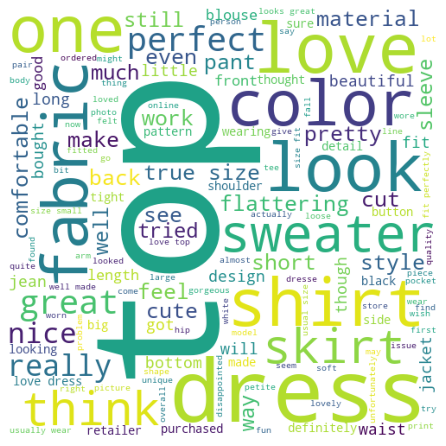

In [ ]:
# Now let's generate a wordcloud for some reviews
wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white',
                min_font_size = 10).generate(all_reviews.str.cat())
  
# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [ ]:
# What departments do we have in the dataset?
df['Department Name'].value_counts()

Tops        10048
Dresses      6145
Bottoms      3662
Intimate     1653
Jackets      1002
Trend         118
Name: Department Name, dtype: int64

In [ ]:
# Compare two departments
jackets = df[df['Department Name'] == 'Jackets']['Review Text']
intimate = df[df['Department Name'] == 'Intimate']['Review Text']
print(intimate.str.cat()[:100])

Absolutely wonderful - silky and sexy and comfortableBought the black xs to go under the larkspur mi


(-0.5, 499.5, 499.5, -0.5)

Text(0.5, 1.0, 'Jackets')

(-0.5, 499.5, 499.5, -0.5)

Text(0.5, 1.0, 'Intimate')

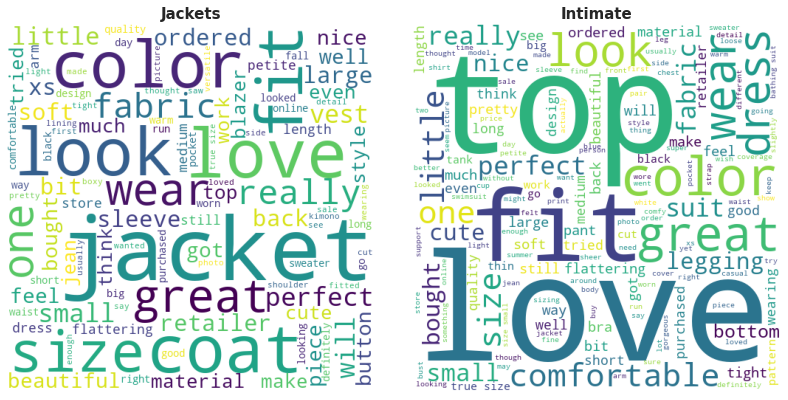

In [ ]:
rows=1
cols=2

row=0 
col=0
titles = ['Jackets', 'Intimate']
w = [jackets.str.cat(),intimate.str.cat(),]
fig, ax = plt.subplots(1, 2, figsize=(12.5,6.5))

for i in range(2):
  ax[col].imshow(WordCloud(width = 500, height = 500, 
                background_color ='white', 
                min_font_size = 10).generate(w[i]))
  ax[col].axis("off")
  ax[col].set_title(titles[i], fontdict={'fontsize': 15, 'fontweight' : 'bold'})
  row=row+1
  if row==rows:
     row=0
     col=col+1

plt.subplots_adjust(left=0.07, right=0.93, wspace=0.1, hspace=0.0,top=0.94,bottom=0.09)
plt.show() 

In [ ]:
# To make this code more scalable, we will automate the wordcloud generation for all categories next.
g = df.groupby(['Department Name'])['Review Text']
for i, k in g:
  i
  print(k.str.cat()[:100])

'Bottoms'

I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothin


'Dresses'

Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never


'Intimate'

Absolutely wonderful - silky and sexy and comfortableBought the black xs to go under the larkspur mi


'Jackets'

A flattering, super cozy coat.  will work well for cold, dry days and will look good with jeans or a


'Tops'

This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to we


'Trend'

This easel caftan is simply amazing! the silhouette fits all sizes and shapes while providing a uniq


What can you notice about preprocessing in the above word clouds?

Text(0.5, 1.0, 'Bottoms')

[]

[]

Text(0.5, 1.0, 'Dresses')

[]

[]

Text(0.5, 1.0, 'Intimate')

[]

[]

Text(0.5, 1.0, 'Jackets')

[]

[]

Text(0.5, 1.0, 'Tops')

[]

[]

Text(0.5, 1.0, 'Trend')

[]

[]

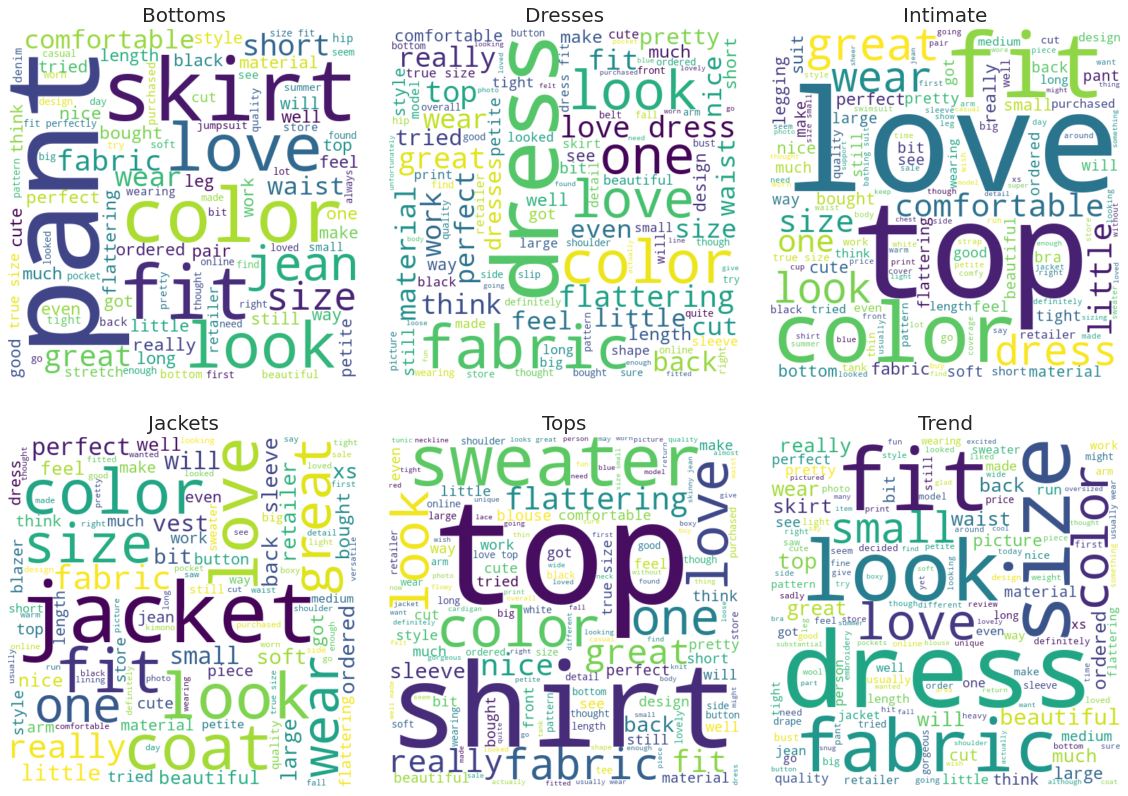

In [ ]:
# Word clouds for all departments
np.random.seed(1)

figure, axes = plt.subplots(2, 3, figsize=(18, 14))
cluster_groups = list(i.str.cat() for k, i in df.groupby(['Department Name'])['Review Text'])
cluster_titles = list(k for k, i in df.groupby(['Department Name'])['Review Text'])
i = 0
for r in range(2):
    for c in range(3):
        df_cluster = cluster_groups[i]
        wordcloud_image = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                min_font_size = 10).generate(df_cluster) 
        ax = axes[r][c]
        ax.imshow(wordcloud_image,
                  interpolation="bilinear")
        ax.set_title(cluster_titles[i], fontsize=20)
        ax.set_xticks([])
        ax.set_yticks([])
        i = i + 1

plt.subplots_adjust(left=0.07, right=0.93, wspace=0.08, hspace=0.0,top=0.9,bottom=0.09)
#plt.tight_layout()
plt.show()

Now that we have some insights about the vocabulary of the reviews, let's dig deeper. We will inspect some of our features.

### Univariate analyses
Single-variable or univariate visualization is the simplest type of visualization which consists of observations on only a single characteristic or attribute. Univariate visualization includes histogram, bar plots and line charts.

#### Polarity
Inspect polarity distribution.

In [ ]:
# Select some reviews with high sentiment polarity
high_pol = df.loc[df['Polarity'] == 1, ['Review Text']].sample(5).values
for r in high_pol:
  print(r[0] + '\n')

Great style!

I love it!!! i can wear out to dinner or just out to lunch with
friends!

If there ever was the perfect feminine dress, this would be it .

Fits perfect!

Great dress for vacations!



In [ ]:
# Select some reviews with low sentiment polarity
low_pol = df.loc[df['Polarity'] < -0.5, ['Review Text']].sample(5).values
for r in low_pol:
    print(r[0]+ '\n')

The button fell off when i took it out of the bag, and i noticed that all of the thread had unraveled. will be returning :-(

This arrived this week and i was so disappointed. the proportions are all wrong--- from the empire waist to the dolman sleeves, to the weird texture added to the material. if i could sum up this jacket with one word it would be "weird".

Received this product with a gaping hole in it. very disappointed in the quality and the quality control at the warehouse

Cut out design, no seems or hems.
 very disappointed in retailer

Hangs terribly off the chest. tent-like. looks maternity. no thanks.



In [ ]:
df['Polarity'].min()

-0.9750000000000001

In [ ]:
df.loc[df['Polarity'] < -0.8]

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review Length,Num Tokens,Polarity
6296,1110,39,"Awful color, horribly wrinkled and just a mess...so disappointed",2,0,1,General,Dresses,Dresses,64,9,-0.916667
14754,868,52,"Cut out design, no seems or hems.\r\n very disappointed in retailer",1,0,0,General,Tops,Knits,65,11,-0.975000
20502,870,61,Received this product with a gaping hole in it. very disappointed in the quality and the quality...,1,0,1,General,Tops,Knits,121,21,-0.975000


Text(0.5, 0, 'Polarity')

Text(0.5, 1.0, 'Polarity distribution')

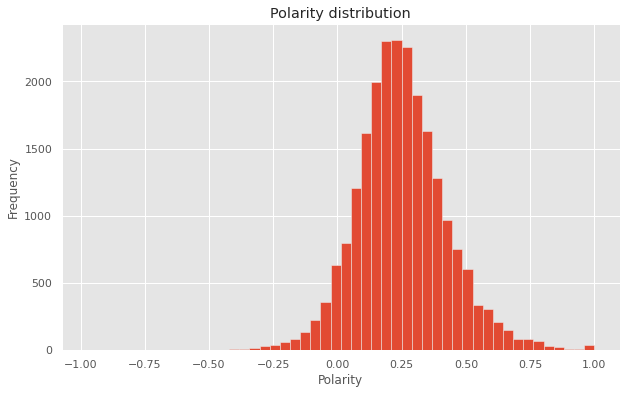

In [ ]:
# Plot the distribution of polarity sentiment score
# change plotting colors per client request
plt.style.use('ggplot')
df['Polarity'].plot(kind='hist', bins=50)
plt.xlabel('Polarity')
plt.title('Polarity distribution')

#### Knowledge check 🤔  

Why does hist makes sense here?

Vast majority of the polarity are greater than 0, means most of them are positive.

#### Ratings

Text(0.5, 0, 'Rating')

Text(0.5, 1.0, 'Rating distribution')

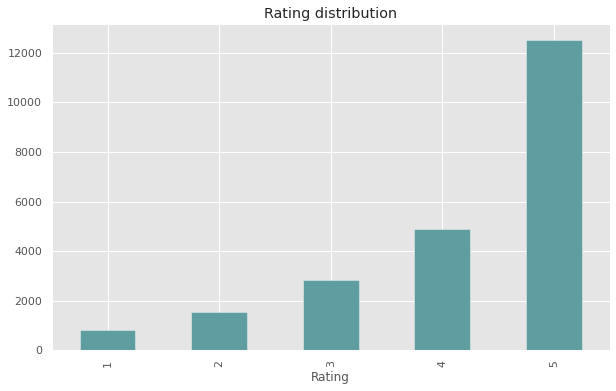

In [ ]:
df['Rating'].value_counts().sort_index().plot(kind='bar', color='cadetblue')
#colourmaps= 'summer'
plt.xlabel('Rating')
plt.title('Rating distribution')

The ratings are in align with the polarity, that is, most of the ratings are at 4 or 5 range.

#### Age

Text(0.5, 0, 'Age')

Text(0.5, 1.0, 'Age distribution')

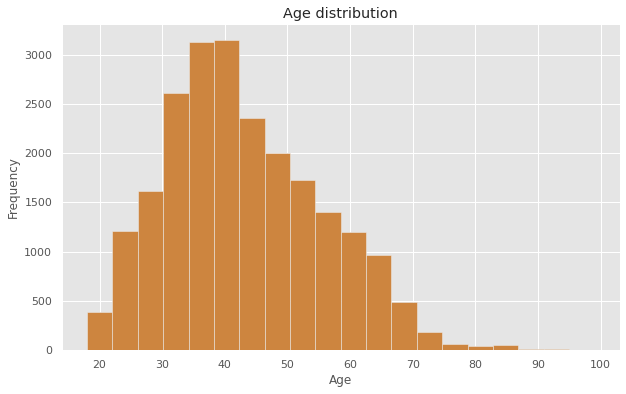

In [ ]:
df['Age'].plot(kind='hist', bins=20, color='peru')
#colourmaps= 'summer'
plt.xlabel('Age')
plt.title('Age distribution')

Most reviewers are in their 30s to 40s.

### Multivariate analyses



---


### Learn & play:
Always read the documentation!

- [Pandas Plotting Documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)

- [Matplotlib Documentation](https://matplotlib.org/)

- [Matplotlib sample plots](https://matplotlib.org/tutorials/introductory/sample_plots.html)

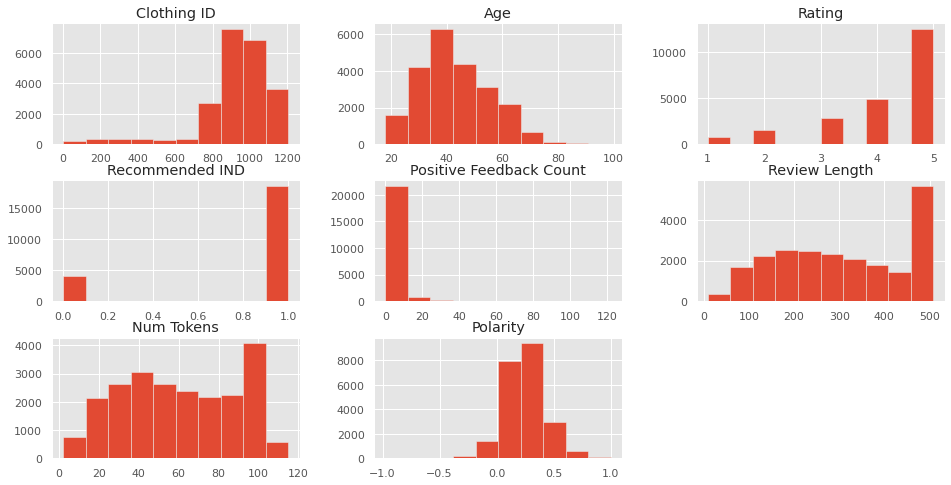

In [ ]:
df.hist(figsize=(16,8));

#### Knowledge check  🤔  

Why doesn't it make plots of ALL the columns in the dataframe?
Hint: what is different about the columns it plots vs. the ones it left out?

#### Scatter plot

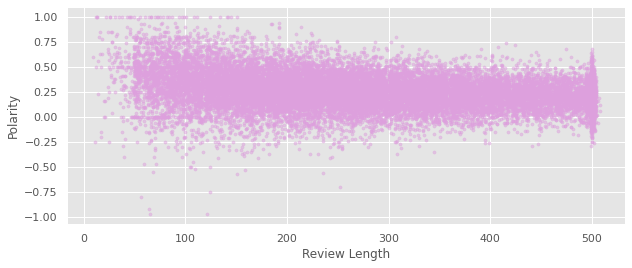

In [ ]:
#Scatter plots are very good at showing the **interaction between two numeric variables** (especially when they're continuous)!
df.plot(kind='scatter', x='Review Length', y='Polarity', \
        color='plum', figsize=(10,4), s=10, alpha=0.5)

#### Scatter matrix
We can also use a thing called a scatter matrix or a pairplot, which is a grid of scatter plots. This allows you to quickly view the interaction of N x M features. You are generally looking for a trend between variables (a line or curve). Using machine learning, you can fit these curves to provide predictive power.

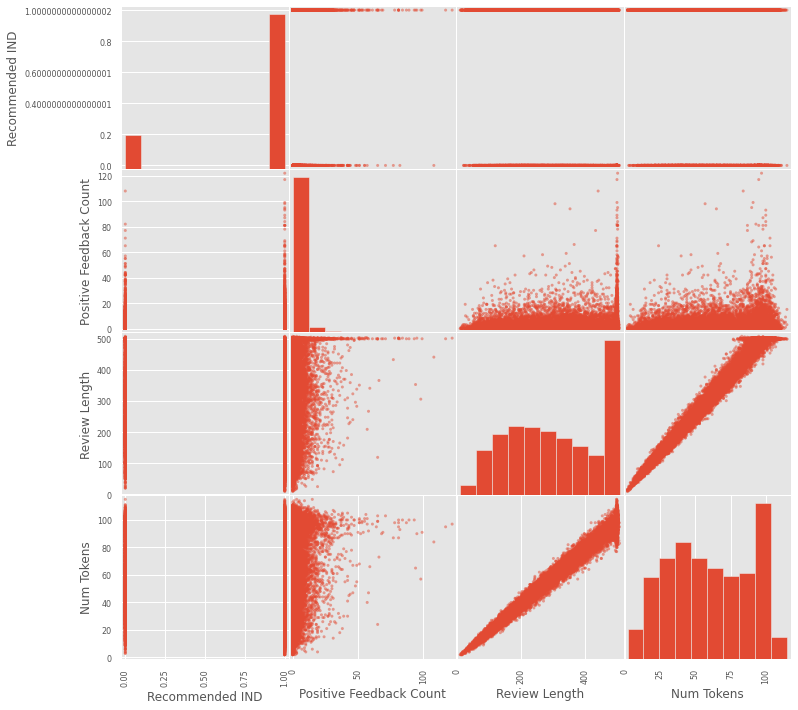

In [ ]:
pd.plotting.scatter_matrix(
    df.select_dtypes(include='number').iloc[:,-5:-1],
    figsize=(12,12)
);

We can also use a very handy parameter, `c`, which allows us to color the dots in a scatter plot. This is extremely helpful when doing **classification problems**, often you will set the color to the class label.

In [ ]:
df['Recommended IND'].unique()

array([1, 0])

Text(0, 0.5, 'Length')

Text(0, 0.5, 'Polarity')

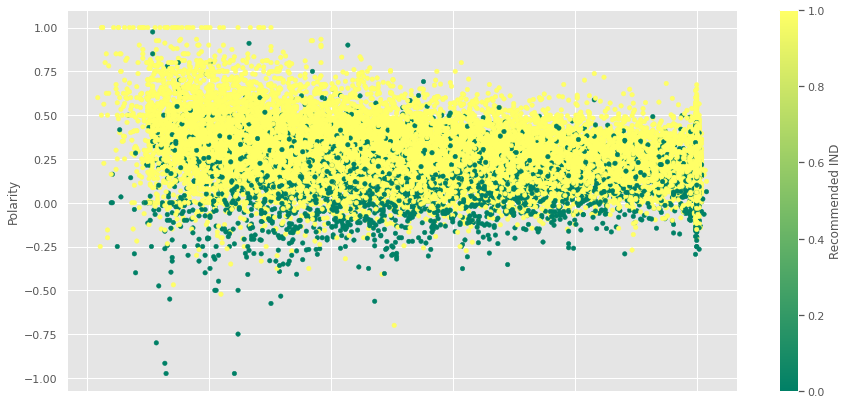

In [ ]:
df.plot(kind='scatter', x='Review Length', y='Polarity', c='Recommended IND', colormap='summer', figsize=(15,7))
plt.ylabel('Length')
plt.ylabel('Polarity')
#plt.savefig('giveaname.png');

Recommended reviews tend to be lengthier than those of not recommended reviews.

#### Boxplot

In [ ]:
# Which department is the best rated?
y0 = df.loc[df['Department Name'] == 'Tops']['Rating']
y1 = df.loc[df['Department Name'] == 'Dresses']['Rating']
y2 = df.loc[df['Department Name'] == 'Bottoms']['Rating']
y3 = df.loc[df['Department Name'] == 'Intimate']['Rating']
y4 = df.loc[df['Department Name'] == 'Jackets']['Rating']
y5 = df.loc[df['Department Name'] == 'Trend']['Rating']

trace0 = go.Box(
    y=y0,
    name = 'Tops',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name = 'Dresses',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name = 'Bottoms',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)
trace3 = go.Box(
    y=y3,
    name = 'Intimate',
    marker = dict(
        color = 'rgb(12, 102, 14)',
    )
)
trace4 = go.Box(
    y=y4,
    name = 'Jackets',
    marker = dict(
        color = 'rgb(10, 0, 100)',
    )
)
trace5 = go.Box(
    y=y5,
    name = 'Trend',
    marker = dict(
        color = 'rgb(100, 0, 10)',
    )
)
data = [trace0, trace1, trace2, trace3, trace4, trace5]
layout = go.Layout(
    title = "Rating Boxplot of Department Name"
)

fig = go.Figure(data=data,layout=layout)
fig.show(renderer="colab")
iplot(fig, filename = "Rating Boxplot of Department Name")

Except Trend department, all the other departments’ median rating were 5. Overall, the ratings are high and sentiment are positive in this review data set.

#### Jointplot

In [ ]:
trace1 = go.Scatter(
    x=df['Age'], y=df['Polarity'], mode='markers', name='points',
    marker=dict(color='rgb(102,0,0)', size=2, opacity=0.4)
)
trace2 = go.Histogram2dContour(
    x=df['Age'], y=df['Polarity'], name='density', ncontours=20,
    colorscale='Hot', reversescale=True, showscale=False
)
trace3 = go.Histogram(
    x=df['Age'], name='Age density',
    marker=dict(color='rgb(102,0,0)'),
    yaxis='y2'
)
trace4 = go.Histogram(
    y=df['Polarity'], name='Sentiment Polarity density', marker=dict(color='rgb(102,0,0)'),
    xaxis='x2'
)
data = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    showlegend=False,
    autosize=False,
    width=1200,
    height=800,
    xaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    yaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    margin=dict(
        t=50
    ),
    hovermode='closest',
    bargap=0,
    xaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    ),
    yaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='2dhistogram-2d-density-plot-subplots')
fig.show(renderer="colab")

Output hidden; open in https://colab.research.google.com to view.

There were few people are very positive or very negative. People who give neutral to positive reviews are more likely to be in their 30s. Probably people at these age are likely to be more active.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22628 entries, 0 to 23485
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Clothing ID              22628 non-null  int64  
 1   Age                      22628 non-null  int64  
 2   Review Text              22628 non-null  object 
 3   Rating                   22628 non-null  int64  
 4   Recommended IND          22628 non-null  int64  
 5   Positive Feedback Count  22628 non-null  int64  
 6   Division Name            22628 non-null  object 
 7   Department Name          22628 non-null  object 
 8   Class Name               22628 non-null  object 
 9   Review Length            22628 non-null  int64  
 10  Num Tokens               22628 non-null  int64  
 11  Polarity                 22628 non-null  float64
dtypes: float64(1), int64(7), object(4)
memory usage: 2.2+ MB


#### Correlation matrix
Compute pairwise correlation of columns, excluding NA/null values.

Parameters
method {‘pearson’, ‘kendall’, ‘spearman’} or callable
Method of correlation:

pearson : standard correlation coefficient

kendall : Kendall Tau correlation coefficient

spearman : Spearman rank correlation

callable: callable with input two 1d ndarrays
and returning a float. Note that the returned matrix from corr will have 1 along the diagonals and will be symmetric regardless of the callable’s behavior.

min_periodsint, optional
Minimum number of observations required per pair of columns to have a valid result. Currently only available for Pearson and Spearman correlation.

<Figure size 864x720 with 0 Axes>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

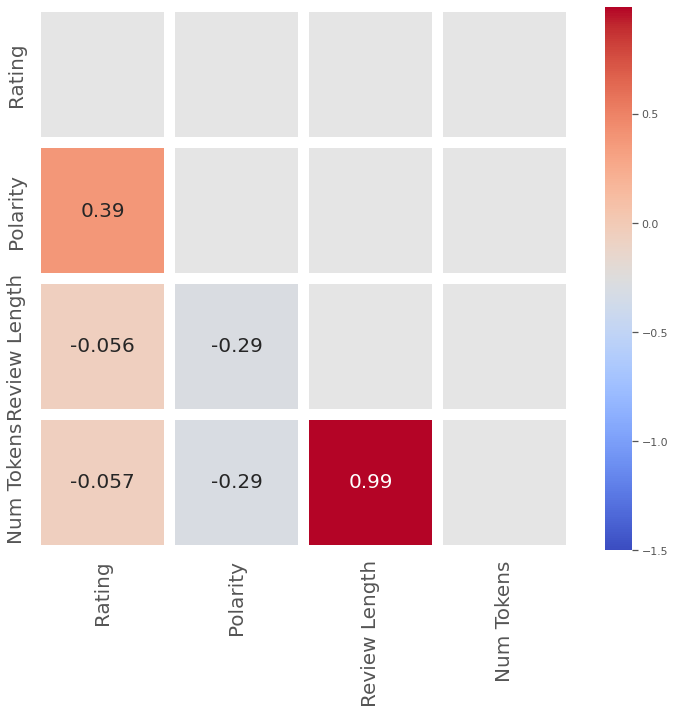

In [ ]:
correlation = df[['Rating','Polarity', 'Review Length', 'Num Tokens']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.heatmap(correlation, cmap='coolwarm', annot=True, annot_kws={"size": 20}, linewidths=10, vmin=-1.5, mask=mask)

### N-gramming

N-grams are used to describe the number of words used as observation points, e.g., unigram means singly-worded, bigram means 2-worded phrase, and trigram means 3-worded phrase. In order to do this, we use scikit-learn’s CountVectorizer function.

#### Unigrams

In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['Review Text'], 20)

unigrams_w_stops = pd.DataFrame(common_words, columns = ['word' , 'count'])
unigrams_w_stops

,word,count
0,the,76158
1,it,49273
2,and,48993
3,is,30636
4,this,25758
5,to,24577
6,in,20722
7,but,16549
8,on,15325
9,for,13994


Text(0.5, 0, 'count')

Text(0, 0.5, 'word')

Text(0.5, 1.0, 'Unigrams with stopwords')

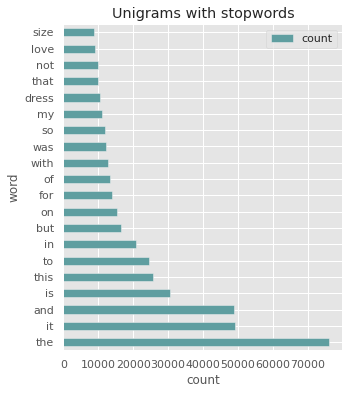

In [ ]:
unigrams_w_stops.plot(kind='barh', x='word', color='cadetblue', width=0.5, figsize=(5,6))
plt.xlabel('count')
plt.ylabel('word')
plt.title('Unigrams with stopwords')

In [ ]:
# Unigrams after stopword removal
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['Review Text'], 20)
unigrams = pd.DataFrame(common_words, columns = ['word' , 'count'])
unigrams

,word,count
0,dress,10567
1,love,8945
2,size,8770
3,fit,7322
4,like,7148
5,wear,6434
6,great,6114
7,just,5604
8,fabric,4797
9,small,4726


Text(0.5, 0, 'count')

Text(0, 0.5, 'word')

Text(0.5, 1.0, 'Unigrams w/o stopwords')

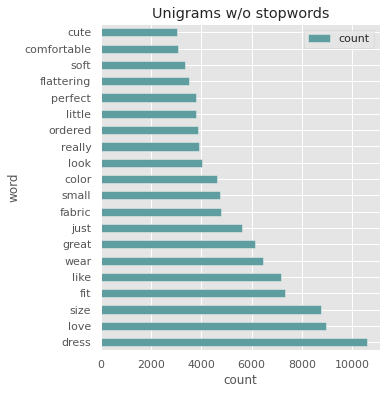

In [ ]:
unigrams.plot(kind='barh', x='word', color='cadetblue', width=0.5, figsize=(5,6))
plt.xlabel('count')
plt.ylabel('word')
plt.title('Unigrams w/o stopwords')

#### Bigrams

In [ ]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['Review Text'], 20)
bigrams = pd.DataFrame(common_words, columns = ['word' , 'count'])

Text(0.5, 0, 'count')

Text(0, 0.5, 'word')

Text(0.5, 1.0, 'Bigrams w/o stopwords')

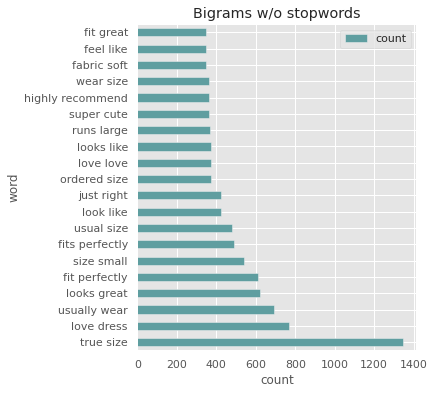

In [ ]:
bigrams.plot(kind='barh', x='word', color='cadetblue', width=0.5, figsize=(5,6))
plt.xlabel('count')
plt.ylabel('word')
plt.title('Bigrams w/o stopwords')

#### Trigrams

In [ ]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['Review Text'], 20)
trigrams = pd.DataFrame(common_words, columns = ['word' , 'count'])

Text(0.5, 0, 'count')

Text(0, 0.5, 'word')

Text(0.5, 1.0, 'Trigrams w/o stopwords')

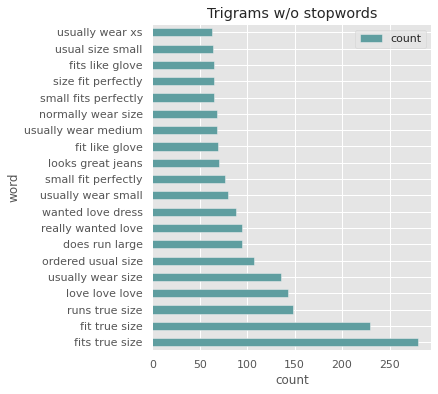

In [ ]:
trigrams.plot(kind='barh', x='word', color='cadetblue', width=0.5, figsize=(5,6))
plt.xlabel('count')
plt.ylabel('word')
plt.title('Trigrams w/o stopwords')

We will talk about n-gram more when we learn about vector representations and classification algorithms. For now, just remember that ngrams can carry special meaning. For instance, data & science might add up closely to data science. However, honeymoon has nothing to do with honey or moon.